In [1]:
# load data frames into pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\Users\\Ronald\\Documents\\EECS_731\\Homework_4\\nfl_games.csv')
#df.head()

In [2]:
# get elo_prob of team2, elo_prob2, and result of team2, result team2
# copy of df
df1 = df.copy()
elo_prob1 = df1['elo_prob1']
#print(elo_prob1)
elo_prob2 = []

for elo_prob in elo_prob1:
    elo_prob2.append(1-elo_prob)

result1 = df1['result1']
result2 = []

for result in result1:
    result2.append(1-result)
    
df1.insert(9, 'elo_prob2', elo_prob2, allow_duplicates=False)
df1['result2'] = result2
#df1.head()

In [3]:
# combine all teams, team_code, elo, elo_prob, score, result into one column instead of two
# must transform date, season, neutral, and playoff columns as well

# create empty dataframe
nfl = pd.DataFrame()

# date
date1 = list(df1['date'].values)
date2 = list(df1['date'].values)
date = [None]*(len(date1)+len(date2))
date[::2] = date1
date[1::2] = date2
nfl['date'] = date
#print(len(date))

# season
season1 = list(df1['season'].values)
season2 = list(df1['season'].values)
season = [None]*(len(season1)+len(season2))
season[::2] = season1
season[1::2] = season2
nfl['season'] = season
#print(len(season))

# bin the seasons
bins = [1919, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
nfl['decades_bin'] = np.searchsorted(bins, nfl['season'].values)

# neutral
neutral1 = list(df1['neutral'].values)
neutral2 = list(df1['neutral'].values)
neutral = [None]*(len(neutral1)+len(neutral2))
neutral[::2] = neutral1
neutral[1::2] = neutral2
nfl['neutral'] = neutral
#print(len(neutral))

# playoff
playoff1 = list(df1['playoff'].values)
playoff2 = list(df1['playoff'].values)
playoff = [None]*(len(playoff1)+len(playoff2))
playoff[::2] = playoff1
playoff[1::2] = playoff2
nfl['playoff'] = playoff
#print(len(playoff))

# team
team1 = list(df1['team1'].values)
team2 = list(df1['team2'].values)
team = [None]*(len(team1)+len(team2))
team[::2] = team1
team[1::2] = team2
nfl['team'] = team
#print(len(team))

# elo
elo1 = list(df1['elo1'].values)
elo2 = list(df1['elo2'].values)
elo = [None]*(len(elo1)+len(elo2))
elo[::2] = elo1
elo[1::2] = elo2
nfl['elo'] = elo
#print(len(elo))

# elo_prob
elo_prob1 = list(df1['elo_prob1'].values)
elo_prob2 = list(df1['elo_prob2'].values)
elo_prob = [None]*(len(elo_prob1)+len(elo_prob2))
elo_prob[::2] = elo_prob1
elo_prob[1::2] = elo_prob2
nfl['elo_prob'] = elo_prob
#print(len(elo_prob))

# score
score1 = list(df1['score1'].values)
score2 = list(df1['score2'].values)
score = [None]*(len(score1)+len(score2))
score[::2] = score1
score[1::2] = score2
nfl['score'] = score
#print(len(score))

# result
result1 = list(df1['result1'].values)
result2 = list(df1['result2'].values)
result = [None]*(len(result1)+len(result2))
result[::2] = result1
result[1::2] = result2
nfl['result'] = result
#print(len(result))

#nfl.head()

In [4]:
# encode team values
# drop teams that show up infrequently
#print(list(nfl['team'].value_counts()))
nfl = nfl.groupby('team').filter(lambda x : len(x) > 5)
#print(list(nfl['team'].value_counts()))
d = {}
team_code = []

count = 1
for team in nfl['team']:
    if team not in d.keys():
        d[team] = count
        count = count + 1
    team_code.append(d[team])
#print(count)
#print(d)
#print(team_code)
    
nfl.insert(6, 'team_code', team_code, allow_duplicates=False)
#nfl.head()
#print(len(nfl))
nfl.to_csv('C:\\Users\\Ronald\\Documents\\EECS_731\\Homework_4\\model_data.csv')

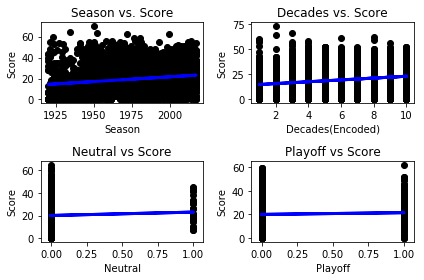

In [5]:
# Linear Regression Model with Single Feature
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Use date_code, season, neutral, playoff, team_code, elo_prob, and result as single features
X1 = nfl['season'].values.reshape(-1,1)
X2 = nfl['decades_bin'].values.reshape(-1,1)
X3 = nfl['neutral'].values.reshape(-1,1)
X4 = nfl['playoff'].values.reshape(-1,1)
X5 = nfl['team_code'].values.reshape(-1,1)
X6 = nfl['elo'].values.reshape(-1,1)
X7 = nfl['elo_prob'].values.reshape(-1,1)
X8 = nfl['result'].values.reshape(-1,1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, nfl['score'], test_size=0.2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, nfl['score'], test_size=0.2)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, nfl['score'], test_size=0.2)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, nfl['score'], test_size=0.2)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, nfl['score'], test_size=0.2)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, nfl['score'], test_size=0.2)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, nfl['score'], test_size=0.2)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, nfl['score'], test_size=0.2)

# create linear regression objects
regr1 = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()
regr3 = linear_model.LinearRegression()
regr4 = linear_model.LinearRegression()
regr5 = linear_model.LinearRegression()
regr6 = linear_model.LinearRegression()
regr7 = linear_model.LinearRegression()
regr8 = linear_model.LinearRegression()

# Train the model using the training sets
regr1.fit(X1_train, y1_train)
regr2.fit(X2_train, y2_train)
regr3.fit(X3_train, y3_train)
regr4.fit(X4_train, y4_train)
regr5.fit(X5_train, y5_train)
regr6.fit(X6_train, y6_train)
regr7.fit(X7_train, y7_train)
regr8.fit(X8_train, y8_train)

# Make predictions using the testing set
y1_pred = regr1.predict(X1_test)
y2_pred = regr2.predict(X2_test)
y3_pred = regr3.predict(X3_test)
y4_pred = regr4.predict(X4_test)
y5_pred = regr5.predict(X5_test)
y6_pred = regr6.predict(X6_test)
y7_pred = regr7.predict(X7_test)
y8_pred = regr8.predict(X8_test)

# Plot outputs
plt.subplot(221)
plt.scatter(X1_test, y1_test,  color='black')
plt.plot(X1_test, y1_pred, color='blue', linewidth=3)
plt.title('Season vs. Score')  
plt.xlabel('Season')  
plt.ylabel('Score')

plt.subplot(222)
plt.scatter(X2_test, y2_test,  color='black')
plt.plot(X2_test, y2_pred, color='blue', linewidth=3)
plt.title('Decades vs. Score')  
plt.xlabel('Decades(Encoded)')  
plt.ylabel('Score')

plt.subplot(223)
plt.scatter(X3_test, y3_test,  color='black')
plt.plot(X3_test, y3_pred, color='blue', linewidth=3)
plt.title('Neutral vs Score')  
plt.xlabel('Neutral')  
plt.ylabel('Score')

plt.subplot(224)
plt.scatter(X4_test, y4_test,  color='black')
plt.plot(X4_test, y4_pred, color='blue', linewidth=3)
plt.title('Playoff vs Score')  
plt.xlabel('Playoff')  
plt.ylabel('Score')

plt.tight_layout()

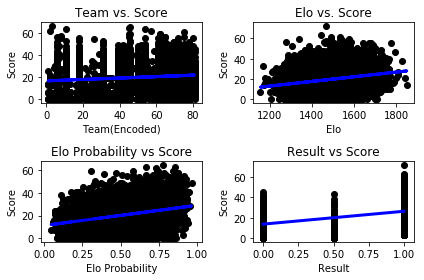

In [6]:
# Plot outputs
plt.subplot(221)
plt.scatter(X5_test, y5_test,  color='black')
plt.plot(X5_test, y5_pred, color='blue', linewidth=3)
plt.title('Team vs. Score')  
plt.xlabel('Team(Encoded)')  
plt.ylabel('Score')

plt.subplot(222)
plt.scatter(X6_test, y6_test,  color='black')
plt.plot(X6_test, y6_pred, color='blue', linewidth=3)
plt.title('Elo vs. Score')  
plt.xlabel('Elo')  
plt.ylabel('Score')

plt.subplot(223)
plt.scatter(X7_test, y7_test,  color='black')
plt.plot(X7_test, y7_pred, color='blue', linewidth=3)
plt.title('Elo Probability vs Score')  
plt.xlabel('Elo Probability')  
plt.ylabel('Score')

plt.subplot(224)
plt.scatter(X8_test, y8_test,  color='black')
plt.plot(X8_test, y8_pred, color='blue', linewidth=3)
plt.title('Result vs Score')  
plt.xlabel('Result')  
plt.ylabel('Score')

plt.tight_layout()

In [7]:
# Linear Regression Model with Multiple Features

# Use date_code, season, neutral, playoff, team_code, elo_prob, and result as features
X = nfl[['decades_bin','season', 'neutral', 'playoff', 'team_code', 'elo','elo_prob','result']]

X_train, X_test, y_train, y_test = train_test_split(X, nfl['score'], test_size=0.2)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# check accuracy of model

# coefficients
print('Coefficients: \n', regr.coef_)
# variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y_test, y_pred))
# mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Coefficients: 
 [-4.78563086e-01  1.29321190e-01  7.19065204e-01  2.53238255e-01
  2.60158898e-02  1.47958795e-03  6.03119362e+00  1.14404763e+01]
Variance score: 0.38
Mean Absolute Error: 7.061024378135498
Mean Squared Error: 78.06991132298837
Root Mean Squared Error: 8.835717929120891


In [8]:
# The coefficients show which factors have the most impact on the model.  According to the coefficients, both the elo_prob
# and the result feautures had the biggest impact on the model's success

# Use elo_prob and result as features
X = nfl[['elo_prob','result']]

X_train, X_test, y_train, y_test = train_test_split(X, nfl['score'], test_size=0.2)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# check accuracy of model

# coefficients
print('Coefficients: \n', regr.coef_)
# variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y_test, y_pred))
# mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Coefficients: 
 [ 6.39634427 11.41224434]
Variance score: 0.35
Mean Absolute Error: 7.146736255707367
Mean Squared Error: 81.49536300695536
Root Mean Squared Error: 9.027478219688783


In [9]:
# Gradient Boosting
# Use all columns besides score as features
from sklearn import ensemble

X = nfl[['season', 'decades_bin', 'neutral', 'playoff', 'team_code', 'elo', 'elo_prob', 'result']]

X_train, X_test, y_train, y_test = train_test_split(X, nfl['score'], test_size=0.2)

params = {'n_estimators': 100, 'max_leaf_nodes': None, 'max_depth': 3, 'random_state': 2}

gb = ensemble.GradientBoostingClassifier(**params)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
y_pred = y_pred.reshape(len(y_pred),1)
# model metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y_test, y_pred))
# mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 10.39%
Variance score: 0.05
Mean Absolute Error: 8.210048520895288
Mean Squared Error: 117.614963218031
Root Mean Squared Error: 10.845043255701242


In [11]:
# Plot training set and test set deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gb.staged_predict(X_test)):
    test_score[i] = gb.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gb.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, nfl.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

ValueError: operands could not be broadcast together with shapes (6389,67) (6389,) 